# **Multi-Agent path finding:**

> Multi-agent path finding or in short refered to as MAPF is a problem for finding paths which are collision or obstacle free for a given set of agents.

# Input:  	
*   A	graph	with N	locations.
*   A	set	of K agents	–	each	with	start	and	goal location.

# Action:
*   An	agent	can	move	or	wait.

# Task:
*   A	path for	each	agent.

# Constraints:
*   Paths	shouldn’t	conflict.
*   Agents	cannot	be	in	the	same	location	at	the	same time.

# Target:
*   Minimize the	sum	of	travel	costs.






# **Conflict based search:**

>Conflict based search or in short refered to as CBS is a multi-agent path finding algorithm.  CBS is a continuum of coupled and decoupled approaches.


> **Coupled	approach:**
* Agents are	planned	together
* Can	be	optimal	
* Complete	
* Exponentially	hard	

>**Decoupled	approach:**
*	Every	agent	plans	separately	
*	Fast	
*	Non	optimal	
*	Many	times	not	complete	

> MAPF problem is solved by CBS by decomposing the MAPF into exponential number of single-agent pathfinding problems. 
>
>**CBS has two levels:**
* The low-level finds optimal paths for the individual agents.
* The high-level of CBS searches the constraint tree (CT). The CT is a binary tree, in which each node N contains: 
       1. A set of constraints imposed on the agents (N.constraints),
       2. A single solution (N.solution) consistent with these constraints, 
       3. The cost of N.solution (N.cost).




# **Algorithm for Conflict based search:**

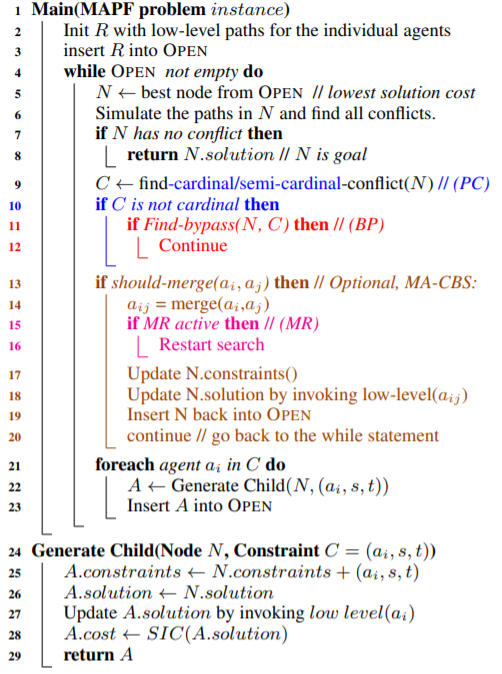

# **Example explaining working of Conflict based search:**

Figure:1

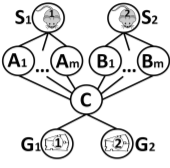

Figure:2

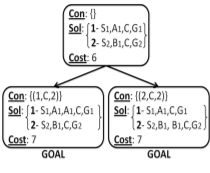

 The mice needs to get to their respective piece of cheese (Figure 1). The corresponding CT is shown in Figure 2. 
 
* The root (R1) contains an empty set of constraints and the low level returns path P1 = <S1, A, C, G1> for agent a1 and path P2 = <S2, B, C, G2> for agent a2. Thus, the total cost of R1 is 6. R1 is then inserted into OPEN list and will be expanded next. 

* When validating the two-agents solution , a conflict <a1, a2, C, 2> is found. As a result, R1 is declared as non-goal and it is split to generate two children to resolve the conflict . The left child U adds the constraint <a1, C, 2> while the right child V adds the constraint <a2, C, 2>. 

* The low-level search is now invoked for U to find an optimal path for agent a1 that also satisfies the new constraint. For U, a1 must wait one time step either at S1 (or at A1) and the path < S1, A1, A1, C, G1 > is returned for a1. The path for a2, < S2, B1, C, G2 > remains unchanged for U. The total cost for the left child is now 7. 

* Similarly, the right child V is generated, also with cost 7. Both children are added to OPEN list. In the final step U is chosen for expansion, and the underlying paths are validated. Since no conflicts exist, U is declared as a goal node and its solution is returned.